
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('ecg.dat')
# sampling frequency of the signal is 500 Hz
fs = 500
# generate correponding time vector
t = np.arange(len(x))/fs

<br>
The signal is an ECG signal with visible PQRST complex. If you zoom on the signal plot you can see that there is a 50Hz perturbation due to the power network. The objective is to remove this component without altering the PQRST complex. Several filtering techniques are used. Comment the advantages and disadvantages.<br>

**Answer:**
- Filtering techniques such as IIR and FIR filters are necessary to effectively remove the 50 Hz powerline interference.
- IIR filters are more computationally efficient because they require fewer coefficients, but they may introduce phase distortion and delay, which can affect the timing of the PQRST complex. They are also not guaranteed to be stable unless the pole radius is under 1.
- FIR filters are always stable and can achieve linear phase, preserving the waveform shape and timing (no distortion). However, they may require a higher order (more coefficients) to reach the same filtering effect, increasing computational cost.
- Zero-phase filtering (e.g., filtfilt) can be used with IIR or FIR filters to minimize phase distortion and delay, preserving the clinical features of the ECG. However, they can only be used post-analysis and not real-time.
- The choice of filter depends on the balance between computational efficiency and the need to preserve signal morphology for accurate analysis.

<br>
Plot time signal and FFT.<br>
Q: Comment the figures.<br>

**Answer:**
- The time signal plot (cell 6) shows the ECG waveform with clear PQRST complexes. The signal is periodic and the main features are visible, but there is a noticeable oscillation due to 50 Hz powerline interference.
- The zoomed-in plot highlights the PQRST complex, making it easier to see the effect of noise and the morphology of the ECG.
- The FFT plot reveals the frequency content of the signal. Most of the energy is concentrated below 35 Hz, corresponding to the physiological ECG components. There is a distinct peak at 50 Hz, confirming the presence of powerline interference. This justifies the need for filtering above 35 Hz and especially at 50 Hz to clean the signal while preserving the PQRST features.

Compute the FFT of the signal

In [3]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

(0.0, 70.0)

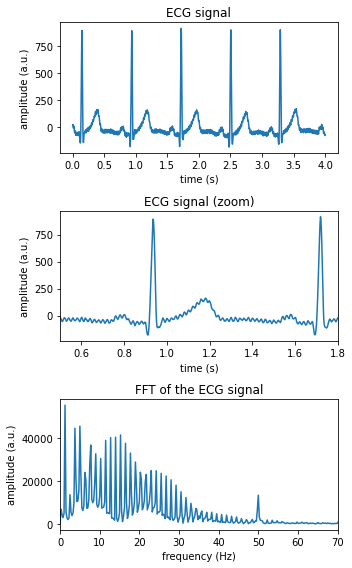

In [4]:
py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.subplot(3,1,2)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal (zoom)')
py.xlim(0.5, 1.8), 
py.subplot(3,1,3)
py.plot(f_fft, abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the ECG signal')
py.tight_layout()
py.xlim(0,70)

IIR filter:<br>
Define a filter with a pass-band up to 35 Hz and a stop band from 50Hz.<br>
Maximum attenuation in passband 3 dB<br>
Minimum attenuation in stopband 40 dB<br>

Q: Comment the results (distortion of the PQRST, delay, ...)<br>
**Answer:**
- The IIR filter effectively attenuates frequencies above 50 Hz, reducing high-frequency noise and powerline interference.
- The PQRST complex is generally preserved, but some minor distortion may occur, especially near the filter cutoff frequencies. The sharpness of the QRS complex can be slightly reduced if the transition band is not steep enough.
- IIR filters introduce phase delay, which can shift the ECG waveform in time. This delay is most noticeable at frequencies near the cutoff and can affect the alignment of the PQRST features. For clinical analysis, zero-phase filtering (e.g., using `filtfilt`) is recommended to minimize delay.

Q: Based on the FFT spectrum comment the selection of the pass and stop band frequencies.<br>
**Answer:**
- The FFT spectrum shows that most ECG signal energy is below 35 Hz, which justifies the pass-band limit. Frequencies above 50 Hz are mainly noise (e.g., powerline interference), so setting the stop band at 50 Hz is appropriate.
- The choice of pass and stop bands should balance signal preservation and noise removal. If the stop band is set too low, important signal components may be lost; if too high, noise may remain. The transition band should be as narrow as possible for optimal filtering.

Analogic limit of the passband frequency

In [5]:
f_pass = 35
# Analogic limit of the stopband frequency
f_stop = 50
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_f = sp.lfilter(b ,a, x)

(0.5, 1.8)

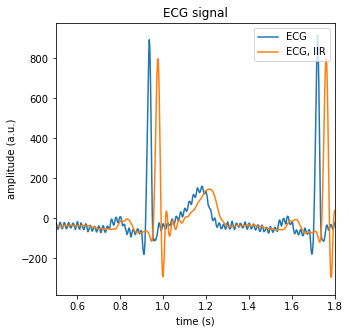

In [6]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

<br>
IIR filter (zero phase):<br>
Use the same filter but apply a zero phase approach.<br>
Q: Comment the results (distortion of the PQRST, delay, ...)<br>

**Answer:**
- Applying a zero-phase IIR filter (using `filtfilt`) removes the phase delay introduced by standard IIR filtering while still effectively removing the 50Hz powerline interference.
- The PQRST complex is preserved without time shift or phase distortion, and the waveform morphology remains intact.
- Zero-phase filtering is ideal for clinical ECG analysis because it avoids distortion and delay, ensuring accurate timing of cardiac events.
- The main limitation is that zero-phase filtering is non-causal and cannot be used in real-time applications, but it is excellent for post-processing and analysis.

Filter the signal

In [7]:
x_f = sp.filtfilt(b ,a, x)

(0.5, 1.8)

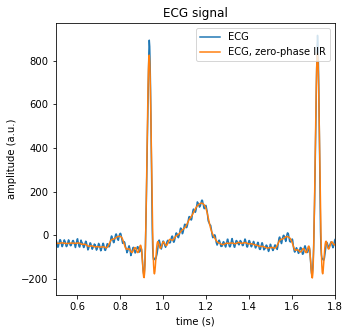

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, zero-phase IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)

<br>
Linear phase FIR filter.<br>
Define a FIR filter with the same properties.<br>
Q: Comment the results (distortion of the PQRST, delay, ...).<br>

**Answer:**
- The linear phase FIR filter preserves the shape and timing of the PQRST complex, avoiding phase distortion.
- FIR filters may introduce a constant group delay, shifting the signal in time, but this delay does not distort the waveform.
- The filtered ECG signal is clean, with the 50 Hz interference removed and the clinical features maintained.
- FIR filters require more coefficients (higher order) than IIR filters for similar performance, which can increase computational cost.
- For offline analysis, the delay can be compensated, and the linear phase property is highly beneficial for accurate ECG interpretation.

length of the filter

In [9]:
l_fir = 101
# compute the filter coefficients using least square approach
b = sp.firls(l_fir, [0, f_pass_N, f_stop_N, 1], [1, 1, 1/100, 1/100])
a = [1]
# filter the signal
x_f = sp.lfilter(b, a, x)

(0.5, 1.8)

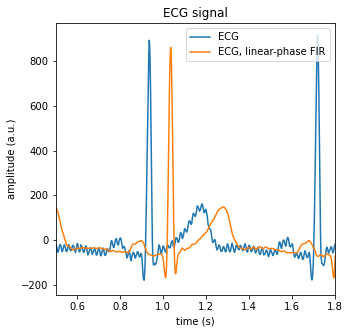

In [10]:
py.figure(4, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, linear-phase FIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)